In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score as auc

In [2]:

data_train_tag = pd.read_csv('./训练数据集1/训练数据集_tag.csv')
data_train_trd = pd.read_csv('./训练数据集1/训练数据集_trd.csv')
data_train_beh = pd.read_csv('./训练数据集1/训练数据集_beh.csv')

test_tag = pd.read_csv('./b/评分数据集_tag_b.csv')
test_trd = pd.read_csv('./b/评分数据集_trd_b.csv')
test_beh = pd.read_csv('./b/评分数据集_beh_b.csv')


In [3]:
# beh训练集
user_pgTimes = pd.DataFrame(data_train_beh.id.value_counts())
user_pgTimes['index'] = user_pgTimes.index
user_pgTimes.index = range(len(user_pgTimes))
user_pgTimes.columns = ['pg_times', 'user']
user_pgTimes = user_pgTimes[['user', 'pg_times']]

In [4]:
# beh测试集
test_user_pgTimes = pd.DataFrame(test_beh.id.value_counts())
test_user_pgTimes['index'] = test_user_pgTimes.index
test_user_pgTimes.index = range(len(test_user_pgTimes))
test_user_pgTimes.columns = ['pg_times', 'user']
test_user_pgTimes = test_user_pgTimes[['user', 'pg_times']]
test_user_pgTimes.shape

(1232, 2)

### 对tag表进行处理

In [5]:
data_train_tag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39923 entries, 0 to 39922
Data columns (total 43 columns):
id                                 39923 non-null object
flag                               39923 non-null int64
gdr_cd                             39923 non-null object
age                                39923 non-null int64
mrg_situ_cd                        39923 non-null object
edu_deg_cd                         27487 non-null object
acdm_deg_cd                        39922 non-null object
deg_cd                             18960 non-null object
job_year                           39923 non-null object
ic_ind                             39923 non-null object
fr_or_sh_ind                       39923 non-null object
dnl_mbl_bnk_ind                    39923 non-null object
dnl_bind_cmb_lif_ind               39923 non-null object
hav_car_grp_ind                    39923 non-null object
hav_hou_grp_ind                    39923 non-null object
l6mon_agn_ind                      399

In [6]:
# 用众数填补缺失值
data_train_tag_1 = data_train_tag.copy()
data_train_tag_1.atdd_type.fillna(data_train_tag_1.atdd_type.mode()[0], inplace=True)
data_train_tag_1.acdm_deg_cd.fillna(data_train_tag_1.acdm_deg_cd.mode()[0], inplace=True)
data_train_tag_1.edu_deg_cd.fillna(data_train_tag_1.edu_deg_cd.mode()[0], inplace=True)
data_train_tag_1.deg_cd.fillna(data_train_tag_1.deg_cd.mode()[0], inplace=True)

In [7]:
# 用训练集众数 填补测试集缺失值
test_tag_1 = test_tag.copy()
test_tag_1.atdd_type.fillna(data_train_tag_1.atdd_type.mode()[0], inplace=True)
test_tag_1.acdm_deg_cd.fillna(data_train_tag_1.acdm_deg_cd.mode()[0], inplace=True)
test_tag_1.edu_deg_cd.fillna(data_train_tag_1.edu_deg_cd.mode()[0], inplace=True)
test_tag_1.deg_cd.fillna(data_train_tag_1.deg_cd.mode()[0], inplace=True)

In [8]:
categorical_cols = data_train_tag_1.select_dtypes(include='object').columns
categorical_cols

Index(['id', 'gdr_cd', 'mrg_situ_cd', 'edu_deg_cd', 'acdm_deg_cd', 'deg_cd',
       'job_year', 'ic_ind', 'fr_or_sh_ind', 'dnl_mbl_bnk_ind',
       'dnl_bind_cmb_lif_ind', 'hav_car_grp_ind', 'hav_hou_grp_ind',
       'l6mon_agn_ind', 'frs_agn_dt_cnt', 'vld_rsk_ases_ind',
       'fin_rsk_ases_grd_cd', 'confirm_rsk_ases_lvl_typ_cd',
       'cust_inv_rsk_endu_lvl_cd', 'tot_ast_lvl_cd', 'pot_ast_lvl_cd',
       'l12mon_buy_fin_mng_whl_tms', 'l12_mon_fnd_buy_whl_tms',
       'l12_mon_insu_buy_whl_tms', 'l12_mon_gld_buy_whl_tms', 'loan_act_ind',
       'ovd_30d_loan_tot_cnt', 'his_lng_ovd_day', 'hld_crd_card_grd_cd',
       'crd_card_act_ind', 'l1y_crd_card_csm_amt_dlm_cd', 'atdd_type'],
      dtype='object')

In [9]:
# 对category'/N'用众数填充
from sklearn.impute import SimpleImputer
imp_mode = SimpleImputer(missing_values = r'\N', strategy='most_frequent')
imp_mode = imp_mode.fit(data_train_tag_1.loc[:, categorical_cols[1:]])
data_train_tag_1.loc[:, categorical_cols[1:]] = imp_mode.transform(data_train_tag_1.loc[:, categorical_cols[1:]])


test_tag_1.loc[:, categorical_cols[1:]] = imp_mode.transform(test_tag_1.loc[:, categorical_cols[1:]])

**要将训练集测试集拼接来进行编码和类型转换**

In [49]:
del(data)

In [50]:
test_tag_1.atdd_type.value_counts()

0      2356
0.0    1529
1.0     115
Name: atdd_type, dtype: int64

In [51]:
test_tag_1.atdd_type = test_tag_1.atdd_type.astype(int)
test_tag_1.atdd_type = test_tag_1.atdd_type.astype(str)

In [53]:
data = pd.concat([data_train_tag_1, test_tag_1], ignore_index=True, sort=False)

In [70]:
# 将部分category转换为数值类型
categorical_num = ['l1y_crd_card_csm_amt_dlm_cd','job_year', 'frs_agn_dt_cnt','fin_rsk_ases_grd_cd', 'l12mon_buy_fin_mng_whl_tms',
       'l12_mon_fnd_buy_whl_tms', 'l12_mon_insu_buy_whl_tms',
       'l12_mon_gld_buy_whl_tms', 'ovd_30d_loan_tot_cnt',
       'his_lng_ovd_day']
categorical_ind = [x for x in categorical_cols if x not in categorical_num]

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43923 entries, 0 to 43922
Data columns (total 43 columns):
id                                 43923 non-null object
flag                               39923 non-null float64
gdr_cd                             43923 non-null object
age                                43923 non-null int64
mrg_situ_cd                        43923 non-null object
edu_deg_cd                         43923 non-null object
acdm_deg_cd                        43923 non-null object
deg_cd                             43923 non-null object
job_year                           43923 non-null object
ic_ind                             43923 non-null object
fr_or_sh_ind                       43923 non-null object
dnl_mbl_bnk_ind                    43923 non-null object
dnl_bind_cmb_lif_ind               43923 non-null object
hav_car_grp_ind                    43923 non-null object
hav_hou_grp_ind                    43923 non-null object
l6mon_agn_ind                      4

In [72]:
data.head()

,id,flag,gdr_cd,age,mrg_situ_cd,edu_deg_cd,acdm_deg_cd,deg_cd,job_year,ic_ind,...,hld_crd_card_grd_cd,crd_card_act_ind,l1y_crd_card_csm_amt_dlm_cd,atdd_type,perm_crd_lmt_cd,cur_debit_cnt,cur_credit_cnt,cur_debit_min_opn_dt_cnt,cur_credit_min_opn_dt_cnt,cur_debit_crd_lvl
0,U7A4BAD,0.0,M,41,B,B,Z,~,3,0,...,-1,0,0,0,3,1,0,3492,-1,10
1,U557810,0.0,M,35,A,F,G,~,4,0,...,-1,0,0,0,1,1,0,4575,-1,10
2,U1E9240,0.0,M,53,B,A,C,C,9,0,...,-1,0,0,0,7,2,0,4894,-1,40
3,U6DED00,0.0,F,41,B,F,Z,~,0,0,...,-1,0,0,0,1,1,0,4938,-1,10
4,UDA8E28,0.0,F,42,B,B,Z,B,3,1,...,-1,0,0,0,2,7,0,2378,-1,20


In [73]:
data.loc[:, categorical_num] = data.loc[:, categorical_num].astype(int)

In [74]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder().fit(data.loc[:, categorical_ind[1:]])
data.loc[:, categorical_ind[1:]] = oe.transform(data.loc[:, categorical_ind[1:]])   

In [2]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder().fit(data.loc[:, categorical_ind[1:]])

NameError: name 'data' is not defined

In [75]:
(data.iloc[:len(data_train_tag_1),:].id == data_train_tag_1.id).sum()

39923

In [76]:
a = data.iloc[len(data_train_tag_1):, :].id.copy()
a.index = np.arange(len(a))

In [77]:
(a == test_tag_1.id).sum()

4000

In [81]:
train_tag = data.iloc[:len(data_train_tag_1),:]

In [564]:
train_tag

,id,flag,gdr_cd,age,mrg_situ_cd,edu_deg_cd,acdm_deg_cd,deg_cd,job_year,ic_ind,...,hld_crd_card_grd_cd,crd_card_act_ind,l1y_crd_card_csm_amt_dlm_cd,atdd_type,perm_crd_lmt_cd,cur_debit_cnt,cur_credit_cnt,cur_debit_min_opn_dt_cnt,cur_credit_min_opn_dt_cnt,cur_debit_crd_lvl
0,U7A4BAD,0.0,1.0,41,1.0,1.0,6.0,5.0,3,0.0,...,0.0,0.0,0,0.0,3,1,0,3492,-1,10
1,U557810,0.0,1.0,35,0.0,4.0,5.0,5.0,4,0.0,...,0.0,0.0,0,0.0,1,1,0,4575,-1,10
2,U1E9240,0.0,1.0,53,1.0,0.0,2.0,2.0,9,0.0,...,0.0,0.0,0,0.0,7,2,0,4894,-1,40
3,U6DED00,0.0,0.0,41,1.0,4.0,6.0,5.0,0,0.0,...,0.0,0.0,0,0.0,1,1,0,4938,-1,10
4,UDA8E28,0.0,0.0,42,1.0,1.0,6.0,1.0,3,1.0,...,0.0,0.0,0,0.0,2,7,0,2378,-1,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39918,U8E66E5,1.0,1.0,24,0.0,4.0,5.0,5.0,1,0.0,...,2.0,1.0,1,0.0,1,0,1,-1,165,0
39919,U70BACF,0.0,1.0,41,1.0,4.0,5.0,5.0,1,0.0,...,2.0,1.0,0,0.0,1,0,2,-1,166,0
39920,U777E7D,0.0,1.0,29,0.0,4.0,5.0,5.0,0,0.0,...,2.0,0.0,0,0.0,3,0,1,-1,166,0
39921,UE77AAD,0.0,1.0,31,0.0,4.0,1.0,5.0,0,0.0,...,2.0,0.0,0,0.0,3,0,1,-1,166,0


In [562]:
train_tag.to_csv('./训练数据集1/train_tag_Ori.csv', index=False)

In [82]:
test_tag = data.iloc[len(data_train_tag_1):, :]
test_tag.index = np.arange(len(test_tag))
test_tag.drop(['flag'], axis=1, inplace=True)

/home/esterl/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [563]:
test_tag

,id,gdr_cd,age,mrg_situ_cd,edu_deg_cd,acdm_deg_cd,deg_cd,job_year,ic_ind,fr_or_sh_ind,...,hld_crd_card_grd_cd,crd_card_act_ind,l1y_crd_card_csm_amt_dlm_cd,atdd_type,perm_crd_lmt_cd,cur_debit_cnt,cur_credit_cnt,cur_debit_min_opn_dt_cnt,cur_credit_min_opn_dt_cnt,cur_debit_crd_lvl
0,U1E63A3,1.0,40,1.0,2.0,1.0,5.0,1,0.0,1.0,...,4.0,1.0,5,0.0,7,1,1,4047,4260,10
1,U3EC77F,1.0,46,0.0,2.0,1.0,5.0,3,0.0,0.0,...,1.0,0.0,0,0.0,4,2,1,5460,3317,10
2,U27DC0C,1.0,42,1.0,4.0,5.0,5.0,3,0.0,0.0,...,1.0,1.0,5,1.0,7,3,2,4103,4108,10
3,U3FAAAC,0.0,35,1.0,1.0,0.0,5.0,5,0.0,1.0,...,2.0,0.0,0,0.0,3,3,1,4733,4748,20
4,U04EA0B,1.0,34,0.0,4.0,5.0,5.0,9,0.0,0.0,...,1.0,1.0,3,1.0,7,6,2,4525,1670,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,U0FBFE2,0.0,58,1.0,1.0,0.0,0.0,29,0.0,0.0,...,2.0,0.0,0,0.0,7,2,1,5341,4413,40
3996,U506AD2,1.0,50,1.0,2.0,1.0,5.0,25,0.0,0.0,...,2.0,0.0,0,0.0,3,1,1,3118,677,20
3997,U287B33,1.0,39,0.0,10.0,6.0,5.0,0,1.0,1.0,...,2.0,0.0,0,0.0,5,2,1,348,313,20
3998,U15134F,1.0,34,0.0,1.0,0.0,5.0,2,0.0,0.0,...,1.0,1.0,2,0.0,3,1,1,3476,3774,10


In [565]:
test_tag.to_csv('./b/test_tag_Ori.csv', index=False)

## 对b榜的trd表处理

In [84]:
test_user_tradTimes = pd.DataFrame(test_trd.id.value_counts())
test_user_tradTimes['index'] = test_user_tradTimes.index
test_user_tradTimes.index = range(len(test_user_tradTimes))
test_user_tradTimes.columns = ['trd_times', 'user']
test_user_tradTimes = test_user_tradTimes[['user', 'trd_times']]

In [85]:
# 总交易金额
output_dict = {}
with open('./b/评分数据集_trd_b.csv') as f:
    for line_num, line in enumerate(f):
        if line_num >0:
            user = line.split(',')[0]
            total_count = float(line.split(',')[-1])
            if user in output_dict:
                total_count += output_dict[user]
                output_dict.update({user:total_count}) # update当前指标加上原指标
            output_dict.update({user:total_count})
output_list = [{'user':k, 'total_count':v} for k, v in output_dict.items()]
test_total_count_df = pd.DataFrame(output_list)

In [86]:
# 合并次数和交易金额
test_user_trd = pd.merge(test_user_tradTimes, test_total_count_df, how='left', left_on='user', right_on='user')

In [87]:
test_user_trd

,user,trd_times,total_count
0,U138010,2427,3083.44
1,U11EFB2,908,4480.40
2,U16D15E,907,-460454.40
3,U4DAD5D,895,-6086.01
4,U0B4571,713,7.66
...,...,...,...
3185,U4A8C17,1,1.07
3186,U118812,1,0.01
3187,U08DAEC,1,-47.00
3188,U335936,1,-100.00


In [88]:
# 支出次数
output_dict = {}
output_dict1 = {}
with open('./b/评分数据集_trd_b.csv') as f:
    for line_num, line in enumerate(f):
        if line_num >0:
            user = line.split(',')[0]
            pay_way = line.split(',')[2]
            B_out = 0
            if user in output_dict:
                B_out += output_dict[user]
                if pay_way == 'B':
                    B_out += 1
                    output_dict.update({user:B_out}) # update当前指标加上原指标
                    continue
            else:
                if pay_way == 'B':
                        B_out = 1
                output_dict.update({user:B_out})
output_list = [{'user':k, 'B_out':v} for k, v in output_dict.items()]
test_B_out_df = pd.DataFrame(output_list)


In [89]:
# 收入次数
output_dict = {}
with open('./b/评分数据集_trd_b.csv') as f:
    for line_num, line in enumerate(f):
        if line_num >0:
            user = line.split(',')[0]
            pay_way = line.split(',')[2]
            C_in = 0
            if user in output_dict:
                C_in += output_dict[user]
                if pay_way == 'C':
                    C_in += 1
                    output_dict.update({user:C_in}) # update当前指标加上原指标
            else:
                if pay_way == 'C':
                    C_in = 1
                output_dict.update({user:C_in})
output_list = [{'user':k, 'C_in':v} for k, v in output_dict.items()]
test_C_in_df = pd.DataFrame(output_list)


In [90]:
# 每位用户的支出金额
output_dict = {}
with open('./b/评分数据集_trd_b.csv') as f:
    for line_num, line in enumerate(f):
        if line_num >0:
            user = line.split(',')[0]
            out_count = 0
            count = float(line.split(',')[-1])
            if user in output_dict:
                out_count += output_dict[user]
                if count<0:
                    out_count += count
                    output_dict.update({user:out_count}) # update当前指标加上原指标
            else:
                if count < 0:
                    out_count = count
                output_dict.update({user:out_count})
output_list = [{'user':k, 'out_count':v} for k, v in output_dict.items()]
test_out_count_df = pd.DataFrame(output_list)


In [92]:
# 每位用户收入金额
output_dict = {}
with open('./b/评分数据集_trd_b.csv') as f:
    for line_num, line in enumerate(f):
        if line_num >0:
            user = line.split(',')[0]
            in_count = 0
            count = float(line.split(',')[-1])
            if user in output_dict:
                in_count += output_dict[user]
                if count>0:
                    in_count += count
                    output_dict.update({user:in_count}) # update当前指标加上原指标
            else:
                if count > 0:
                    in_count = count
                output_dict.update({user:in_count})
output_list = [{'user':k, 'in_count':v} for k, v in output_dict.items()]
test_in_count_df = pd.DataFrame(output_list)

In [93]:
test_user_trd = pd.merge(test_user_trd, test_B_out_df, how='left', left_on='user', right_on='user')
test_user_trd = pd.merge(test_user_trd, test_C_in_df, how='left', left_on='user', right_on='user')
test_user_trd = pd.merge(test_user_trd, test_out_count_df, how='left', left_on='user', right_on='user')

In [94]:
test_user_trd['out_count'] = abs(test_user_trd.out_count)
test_use_trd = pd.merge(test_user_trd, test_in_count_df, how='left', left_on='user', right_on='user')

In [95]:
test_use_trd

,user,trd_times,total_count,B_out,C_in,out_count,in_count
0,U138010,2427,3083.44,10,0,405153.08,408236.52
1,U11EFB2,908,4480.40,0,0,414456.87,418937.27
2,U16D15E,907,-460454.40,45,79,4296279.44,3835825.04
3,U4DAD5D,895,-6086.01,0,0,1388184.73,1382098.72
4,U0B4571,713,7.66,3,0,123336.92,123344.58
...,...,...,...,...,...,...,...
3185,U4A8C17,1,1.07,0,0,0.00,1.07
3186,U118812,1,0.01,0,0,0.00,0.01
3187,U08DAEC,1,-47.00,1,0,47.00,0.00
3188,U335936,1,-100.00,1,0,100.00,0.00


In [96]:
test_use_trd.to_csv('./b/train_use_trd.csv', index=False)

## 拼接表格

In [97]:
# 读取trd表
train_trd = pd.read_csv('./训练数据集1/train_use_trd.csv')
test_trd = pd.read_csv('./b/train_use_trd.csv')

In [98]:
train_trd

,user,trd_times,total_count,B_out,C_in,out_count,in_count
0,UBD9C48,5836,2173.69,5693,143,962039.77,964213.46
1,U8AE05B,2589,-19.04,1232,1357,3354162.49,3354143.45
2,U0015B2,2490,-13241.21,1535,955,1966131.73,1952890.52
3,U9E0C0D,2392,4145.88,1117,1275,3940858.61,3945004.49
4,U7EF7EC,2237,-1990.99,2063,174,342173.63,340182.64
...,...,...,...,...,...,...,...
31988,U0FB42D,1,4.80,0,1,0.00,4.80
31989,U802EEF,1,0.04,0,1,0.00,0.04
31990,U0E3E25,1,-120.00,1,0,120.00,0.00
31991,U74C352,1,0.06,0,1,0.00,0.06


In [99]:
test_trd

,user,trd_times,total_count,B_out,C_in,out_count,in_count
0,U138010,2427,3083.44,10,0,405153.08,408236.52
1,U11EFB2,908,4480.40,0,0,414456.87,418937.27
2,U16D15E,907,-460454.40,45,79,4296279.44,3835825.04
3,U4DAD5D,895,-6086.01,0,0,1388184.73,1382098.72
4,U0B4571,713,7.66,3,0,123336.92,123344.58
...,...,...,...,...,...,...,...
3185,U4A8C17,1,1.07,0,0,0.00,1.07
3186,U118812,1,0.01,0,0,0.00,0.01
3187,U08DAEC,1,-47.00,1,0,47.00,0.00
3188,U335936,1,-100.00,1,0,100.00,0.00


In [100]:
train_data = pd.merge(train_tag, train_trd, how='left', left_on='id', right_on='user')
train_data.drop(['user'], axis=1, inplace=True)
train_data.shape

(39923, 49)

In [101]:
train_data = pd.merge(train_data, user_pgTimes, how='left', left_on='id', right_on='user')
train_data.drop(['user'], axis=1, inplace=True)
train_data.shape

(39923, 50)

In [102]:
test_data = pd.merge(test_tag, test_trd, how='left', left_on='id', right_on='user')
test_data.drop(['user'], axis=1, inplace=True)
test_data.shape

(4000, 48)

In [103]:
test_data = pd.merge(test_data, test_user_pgTimes, how='left', left_on='id', right_on='user')
test_data.drop(['user'], axis=1, inplace=True)
test_data.shape

(4000, 49)

In [104]:
# 对pgTime进行填充
train_data.pg_times.fillna(train_data.pg_times.mode()[0], inplace=True)
test_data.pg_times.fillna(train_data.pg_times.mode()[0], inplace=True)

In [105]:
train_data.head()

,id,flag,gdr_cd,age,mrg_situ_cd,edu_deg_cd,acdm_deg_cd,deg_cd,job_year,ic_ind,...,cur_debit_min_opn_dt_cnt,cur_credit_min_opn_dt_cnt,cur_debit_crd_lvl,trd_times,total_count,B_out,C_in,out_count,in_count,pg_times
0,U7A4BAD,0.0,1.0,41,1.0,1.0,6.0,5.0,3,0.0,...,3492,-1,10,3.0,2400.00,1.0,2.0,15000.00,17400.00,1.0
1,U557810,0.0,1.0,35,0.0,4.0,5.0,5.0,4,0.0,...,4575,-1,10,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,U1E9240,0.0,1.0,53,1.0,0.0,2.0,2.0,9,0.0,...,4894,-1,40,17.0,-25439.96,6.0,11.0,131158.00,105718.04,35.0
3,U6DED00,0.0,0.0,41,1.0,4.0,6.0,5.0,0,0.0,...,4938,-1,10,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,UDA8E28,0.0,0.0,42,1.0,1.0,6.0,1.0,3,1.0,...,2378,-1,20,18.0,9089.51,5.0,13.0,70416.04,79505.55,22.0


## 对trd信息进行补充
众数填充

In [266]:
train_data_ = train_data.copy()
test_data_ = test_data.copy()

In [275]:
train_data_.iloc[:, -7:-1].isnull().sum()
train_data_.iloc[:,-2]

0         17400.00
1              NaN
2        105718.04
3              NaN
4         79505.55
           ...    
39918       900.00
39919        10.00
39920          NaN
39921          NaN
39922     19062.00
Name: in_count, Length: 39923, dtype: float64

In [279]:
for i in range(-7, -1):
    train_data_.iloc[:, i].fillna(train_data_.iloc[:, i].mode()[0], inplace=True)
    test_data_.iloc[:, i].fillna(train_data_.iloc[:, i].mode()[0], inplace=True)

In [281]:
train_data_.iloc[:, -7:-1].isnull().sum()

trd_times      0
total_count    0
B_out          0
C_in           0
out_count      0
in_count       0
dtype: int64

In [290]:
test_data_.to_csv('./b/test_data_.csv', index=False)
train_data_.to_csv('./b/train_data_.csv', index=False)

## 建模分析

In [283]:
train_data_1 = train_data_.copy()
X, y = train_data_1.iloc[:,2:], train_data_1['flag']

In [284]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
Xtrain.shape[0] == 



In [285]:
import xgboost as xgb

dtrain = xgb.DMatrix(Xtrain, Ytrain)
dtest = xgb.DMatrix(Xtest, Ytest)
dfull = xgb.DMatrix(X,y)

In [286]:
from time import time
import datetime

(y==1).sum()/len(y)

0.22425669413621221

In [287]:
params = {'booster': 'gbtree',
         'objective': 'binary:logistic',
         'eval_metric': 'auc',
         'max_depth': 3,
         'lambda': 80,
         'gamma':0.15,
         'subsample': 0.75,
         'colsample_bytree': 0.5,
         'colsample_bylevel': 1,
         'colsample_bynode': 0.75,
         'min_child_weight': 30,
         'eta': 0.03,
         'seed': 0,
         'silent': 1,
         'n_fold': 5,
         'scale_pos_weight':1}
num_round=480

In [288]:
bst = xgb.train(params, dtrain, num_round)
preds = bst.predict(dtest)
print('train:{}'.format(auc(Ytrain, bst.predict(dtrain))))
auc(Ytest, preds)

train:0.7520516170775542


0.7346327602033151

00:16:188144
00:19:480330
00:16:159448


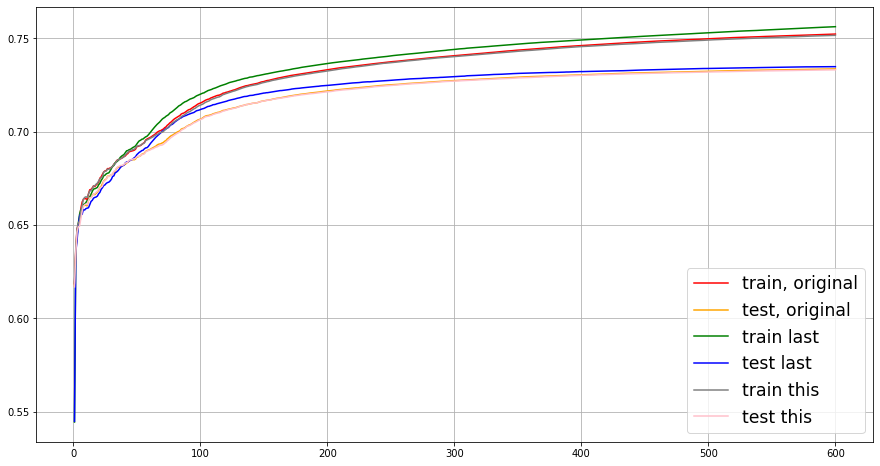

In [500]:
# param1 =  {'booster': 'gbtree',
#          'objective': 'binary:logistic',
#          'eval_metric': 'auc',
#          'max_depth': 3,
#          'lambda': 1,
#          'gamma': 0,
#          'subsample': 1,
#          'colsample_bytree': 1,
#          'colsample_bylevel': 1,
#          'colsample_bynode': 1,
#          'min_child_weight': 1,
#          'eta': 0.3,
#          'seed': 0,
#          'silent': 1,
#          'n_fold': 5,
#          'scale_pos_weight':1}
param1 = {'booster': 'gbtree',
         'objective': 'binary:logistic',
         'eval_metric': 'auc',
         'max_depth': 3,
         'lambda': 200,
         'gamma': 0.2,
         'subsample': 1,
         'colsample_bytree': 1,
         'colsample_bylevel': 0.5,
         'colsample_bynode': 0.75,
         'min_child_weight': 20,
         'eta': 0.028,
         'seed': 0,
         'silent': 1,
         'n_fold': 5,
         'scale_pos_weight':1}
num_round = 600

time0 = time()
cvResult = xgb.cv(param1, dfull, num_round)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
fig, ax = plt.subplots(1,figsize=(15,8))
ax.grid()
ax.plot(range(1,(num_round+1)), cvResult.iloc[:,0], c='r', label='train, original')
ax.plot(range(1,(num_round+1)), cvResult.iloc[:,2], c='orange', label='test, original')

param2 = {'booster': 'gbtree',
         'objective': 'binary:logistic',
         'eval_metric': 'auc',
         'max_depth': 3,
         'lambda': 200,
         'gamma': 0.15,
         'subsample': 0.75,
         'colsample_bytree': 1,
         'colsample_bylevel': 0.5,
         'colsample_bynode': 1,
         'min_child_weight': 30,
         'eta': 0.035,
         'seed': 0,
         'silent': 1,
         'n_fold': 5,
         'scale_pos_weight':1}
param3 = {'booster': 'gbtree',
         'objective': 'binary:logistic',
         'eval_metric': 'auc',
         'max_depth': 3,
         'lambda': 200,
         'gamma': 0.2,
         'subsample': 1,
         'colsample_bytree': 1,
         'colsample_bylevel': 0.5,
         'colsample_bynode': 0.75,
         'min_child_weight': 30,
         'eta': 0.028,
         'seed': 0,
         'silent': 1,
         'n_fold': 5,
         'scale_pos_weight':1}
time0 = time()
cvResult2 = xgb.cv(param2, dfull, num_round)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

time0 = time()
cvResult3 = xgb.cv(param3, dfull, num_round)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

ax.plot(range(1,(num_round+1)), cvResult2.iloc[:,0], c='green', label='train last')
ax.plot(range(1,(num_round+1)), cvResult2.iloc[:,2], c='blue', label='test last')


ax.plot(range(1,(num_round+1)), cvResult3.iloc[:,0], c='grey', label='train this')
ax.plot(range(1,(num_round+1)), cvResult3.iloc[:,2], c='pink', label='test this')
ax.legend(fontsize='xx-large')
# plt.yticks([0.7,0.75,0.8])
plt.show()

In [461]:
params = {'booster': 'gbtree',
         'objective': 'binary:logistic',
         'eval_metric': 'auc',
         'max_depth': 3,
         'lambda': 80,
         'gamma':0.15,
         'subsample': 0.75,
         'colsample_bytree': 0.5,
         'colsample_bylevel': 1,
         'colsample_bynode': 0.75,
         'min_child_weight': 30,
         'eta': 0.03,
         'seed': 0,
         'silent': 1,
         'n_fold': 5,
         'scale_pos_weight':1}
num_round=600

In [451]:
params2 = {'booster': 'gbtree',
         'objective': 'binary:logistic',
         'eval_metric': 'auc',
         'max_depth': 3,
         'lambda': 200,
         'gamma': 0.15,
         'subsample': 0.75,
         'colsample_bytree': 1,
         'colsample_bylevel': 0.5,
         'colsample_bynode': 0.75,
         'min_child_weight': 10,
         'eta': 0.035,
         'seed': 0,
         'silent': 1,
         'n_fold': 5,
         'scale_pos_weight':1}

In [533]:
params3 = {'booster': 'gbtree',
         'objective': 'binary:logistic',
         'eval_metric': 'auc',
         'max_depth': 3,
         'lambda': 200,
         'gamma': 0.2,
         'subsample': 1,
         'colsample_bytree': 1,
         'colsample_bylevel': 0.5,
         'colsample_bynode': 0.75,
         'min_child_weight': 20,
         'eta': 0.028,
         'seed': 0,
         'silent': 1,
         'n_fold': 5,
         'scale_pos_weight':1}
params4 = {'booster': 'gbtree',
         'objective': 'binary:logistic',
         'eval_metric': 'auc',
         'max_depth': 3,
         'lambda': 100,
         'gamma': 0.2,
         'subsample': 1,
         'colsample_bytree': 1,
         'colsample_bylevel': 0.5,
         'colsample_bynode': 0.75,
         'min_child_weight': 20,
         'eta': 0.03,
         'seed': 0,
         'silent': 1,
         'n_fold': 5,
         'scale_pos_weight':1}

In [548]:
bst = xgb.train(params3, dfull, num_round)

In [549]:
preds = bst.predict(dtest)
auc(Ytest, preds)

0.7508864348295987

In [550]:
import joblib

joblib.dump(bst, './b/xgboost-fintech-joblib_3.dat')

['./b/xgboost-fintech-joblib_3.dat']

In [551]:
loaded_model_joblib = joblib.load('./b/xgboost-fintech-joblib_3.dat')
preds = loaded_model_joblib.predict(dtest)

auc(Ytest, preds)

0.7508864348295987

In [552]:
del(data_test_)

In [553]:
data_test_ = test_data.copy()

In [554]:
test_data_feature = data_test_.drop(['id'], axis=1)
user_id = data_test_['id']
test_data_feature.shape

(4000, 48)

In [555]:
dtest_a = xgb.DMatrix(test_data_feature)

In [556]:
data_test_['preds'] = loaded_model_joblib.predict(dtest_a)

In [557]:
output_a = data_test_.loc[:,['id', 'preds']]

In [558]:
output_a.to_csv('./b/submit_b_3.txt', sep='\t',header=None, index=False, encoding='utf8')

In [559]:
from xgboost import plot_importance

<Figure size 1440x7200 with 0 Axes>

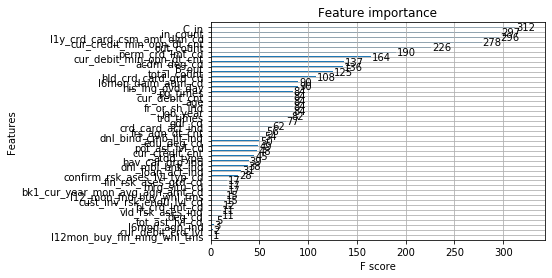

In [560]:
fig = plt.figure(figsize=(20, 100))
plot_importance(loaded_model_joblib)
plt.show()

In [566]:
from sklearn.linear_model import LogisticRegression as LR

In [567]:
LR_ = LR()

In [570]:
LR_ = LR_.fit(Xtrain, Ytrain)

/home/esterl/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/esterl/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [571]:
LR_.score(Xtest, Ytest)

0.7744844284879352

In [572]:
preds = LR_.predict_proba(Xtest)

In [574]:
preds

array([[0.65075737, 0.34924263],
       [0.67529885, 0.32470115],
       [0.72341639, 0.27658361],
       ...,
       [0.703316  , 0.296684  ],
       [0.78023009, 0.21976991],
       [0.69552438, 0.30447562]])

In [576]:
preds.shape

(11977, 2)

In [578]:
preds[:,1]

array([0.34924263, 0.32470115, 0.27658361, ..., 0.296684  , 0.21976991,
       0.30447562])

In [581]:
auc(Ytest, preds[:,1])

0.5662789688180201

In [582]:
data_train_tag.shape

(39923, 43)

In [586]:
train_data_.age.value_counts()

30    2513
31    2462
32    2239
33    2227
29    2117
28    1998
34    1908
27    1862
26    1671
25    1542
35    1530
36    1468
38    1379
37    1323
24    1197
39    1159
41     958
40     932
23     820
42     806
22     678
43     644
44     607
45     557
46     544
47     489
49     479
48     470
50     450
21     441
52     331
51     328
20     233
57     208
53     200
54     192
56     189
55     163
58     138
60      71
59      69
62      52
61      48
63      47
65      30
64      29
66      28
19      18
67      17
69      15
68      14
70      13
71       7
74       5
72       2
73       2
76       1
77       1
84       1
79       1
Name: age, dtype: int64